<a href="https://colab.research.google.com/github/sharique-ansari/ScientificComputing/blob/master/scmpHW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sharique Ansari
##2016249
##Homework 3


#Solution to question 1
##Part A

In [0]:
# imports
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.linalg as npla
import scipy.linalg as spla
import math
import pylab

In [0]:
# Helper functions
def hilbert(n):
    output=np.zeros((n,n), dtype=float)
    for i in range(n):
        for j in range(n):
            temp=math.pow((i+j+1),-1)
            output[i][j] = temp
    return output

def sqrt(x):
    return math.sqrt(x)
vecsqrt = np.vectorize(sqrt)

##Classic gram-schmidt

In [0]:
def gramschmidt(n):
    A = hilbert(n)
    m,n = A.shape
    Q = np.zeros((m,n),dtype=float)
    R = np.zeros((m,n),dtype=float)
    
    for k in range(0, m):
        dotp = np.dot(A[:, k], A[:, k])
        R[k, k] = vecsqrt(dotp)
        Q[:, k] = A[:, k]/R[k, k]

        for j in range(k+1, m):
            R[k, j] = np.dot(Q[:, k], A[:, j])
            A[:, j] = A[:, j] - np.dot(R[k,j],Q[:,k]) 
    return Q, R

# Below method is implemented for applying classic gram-schmidt method twice,
# i.e again on Q returned from previous method

def classicdouble(A):
    m,n = A.shape
    Q = np.zeros((m,n),dtype=float)
    R = np.zeros((m,n),dtype=float)
    
    for k in range(0, m):
        dotp = np.dot(A[:, k], A[:, k])
        R[k, k] = vecsqrt(dotp)
        Q[:, k] = A[:, k]/R[k, k]

        for j in range(k+1, m):
            R[k, j] = np.dot(Q[:, k], A[:, j])
            A[:, j] = A[:, j] - np.dot(R[k,j],Q[:,k]) 
    return Q, R


1.8102377332636852e-15
8.581695040991233e-15
2.985676933593325e-13
1.2092291821090926e-11
2.506779113699394e-10
5.616295702776767e-09
1.5329835345955475e-07
3.3613023880283893e-06
3.674040899270175e-05
0.0059608289765419546
0.23102986533836933
0.999972679641364
0.961561807842266
0.8497984297471252
0.97482377800888
0.998056423838412
0.9999038590897396
0.9994171495184897
0.9999290951211782
0.9999710088280306
0.9992580540347273
0.9999229751934943
0.9998653536443995


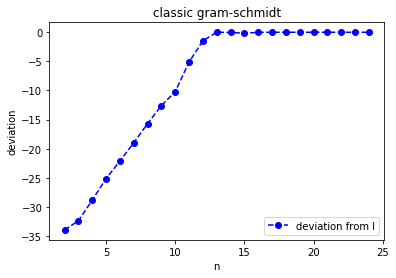

In [0]:
# plotting for classic gram-schmidt

nvalues = range(2,25)
output = []
for i,j in enumerate(nvalues,2):
    Q,R = gramschmidt(i)
    absv = abs(np.linalg.norm(np.identity(i)-np.dot(np.transpose(Q),Q),2))
    # print(absv)
    output.append(math.log(absv))

pylab.plot(nvalues,output,'bo--',label = "deviation from I")
pylab.legend(loc='lower right')
pylab.ylabel("deviation")
pylab.xlabel("n")
pylab.title('classic gram-schmidt')
pylab.show()

##Modified Gram-Schmidth

In [0]:
def modgramschmidt(n):
    A = hilbert(n)
    m,n = A.shape
    
    Q=np.zeros(A.shape)
    R=np.zeros(A.shape)
    for k in range(0,m):
        
        R[k,k] = np.linalg.norm(A[:,k], 2)
        Q[:,k] = np.dot(1.0/R[k,k],A[:,k])
        for j in range(k+1,m):
            R[k,j] = np.inner(A[:,j],Q[:,k])
            A[:,j] = A[:,j] - R[k,j]*Q[:,k]
    return Q,R
Q, R = modgramschmidt(3)
print (np.dot(Q, R))

[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]


1.748838621544152e-15
5.186144719264882e-15
2.9753813302657307e-13
1.204085381011086e-11
2.512061034300381e-10
5.521005564966702e-09
1.5586904085028192e-07
4.309144491404371e-06
1.844023627651074e-05
0.006496656874504463
0.2596746898408536
0.8192443810783507
0.6832446935631583
0.9892405485494042
0.9752387997209471
0.9968489642972203
0.9999983950308567
0.9998749955378781
0.9999320768183094
0.9996910926793454
0.9986967523254501
0.9999932371917493
0.9998399188475569


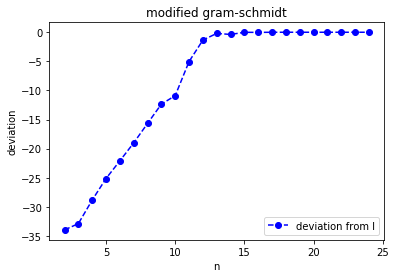

In [0]:
# plotting for modified gram-schmidt

nvalues = range(2,25)
output = []
for i,j in enumerate(nvalues,2):
    Q,R = modgramschmidt(i)
    absv = abs(np.linalg.norm(np.identity(i)-np.dot(np.transpose(Q),Q),2))
    # print(absv)
    output.append(math.log(absv))

pylab.plot(nvalues,output,'bo--',label = "deviation from I")
pylab.legend(loc='lower right')
pylab.ylabel("deviation")
pylab.xlabel("n")
pylab.title('modified gram-schmidt')
pylab.show()

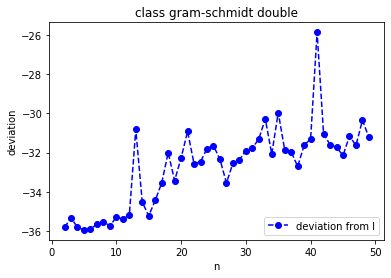

In [0]:
# plotting for double classic gram-schmidt

nvalues = range(2,50)
output = []
for i,j in enumerate(nvalues,2):
    Q1,R = gramschmidt(i)
    Q,R = classicdouble(Q1)
    absv = abs(np.linalg.norm(np.identity(i)-np.dot(np.transpose(Q),Q),2))
    # print(absv)
    output.append(math.log(absv))

pylab.plot(nvalues,output,'bo--',label = "deviation from I")
pylab.legend(loc='lower right')
pylab.ylabel("deviation")
pylab.xlabel("n")
pylab.title('class gram-schmidt double')
pylab.show()

This graph shows a zig-zag relationship with values of n and is not constant.
As can be seen both classic gram-schmidt and modified gram-schmidt method output pretty similar results and increase in accuracy as value of n increases.
but on the other hand classic double gram-schmidt method follows the graph similar to that of householder with non-linearity.

##Householder method

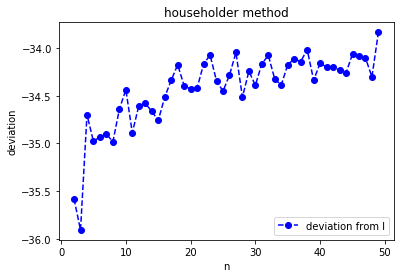

In [0]:
# plotting for householder method
nvalues = range(2,50)
output = []
for i,j in enumerate(nvalues,2):
    Q,R = np.linalg.qr(hilbert(i))
    # Q,R = modgramschmidt(i)
    absv = abs(np.linalg.norm(np.identity(i)-np.dot(np.transpose(Q),Q),2))
    # print(absv)
    output.append(math.log(absv))

pylab.plot(nvalues,output,'bo--',label = "deviation from I")
pylab.legend(loc='lower right')
pylab.ylabel("deviation")
pylab.xlabel("n")
pylab.title('householder method')
pylab.show()

We can see that this graph not linear with the value of n but deviation from I continue to decrease with increase in value of n. This graph has same irregularities as clasiic double gram-schmidt graph but is much different from other 2.

Cholesky method

0.9342585459106648
0.9973126596442266
0.9999032976959773
0.9999967120712278
0.9999998917200514
0.9999999965061013
0.9999999998888461
0.9999999999965
0.9999999999998905
0.9999999999999962
0.9999999999999999
0.9999999999999997


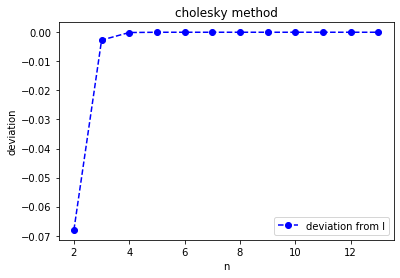

In [0]:
# # plotting for cholesky
nvalues = range(2,14)
output = []
for i,j in enumerate(nvalues,2):
    A = hilbert(i)
    L = np.linalg.cholesky(A)
    l_inv_trans = np.linalg.inv(np.transpose(L)) 
    Q = np.dot(A,l_inv_trans)
    absv = abs(np.linalg.norm(np.identity(i)-np.dot(np.transpose(Q),Q),2))
    print(absv)
    output.append(math.log(absv))

pylab.plot(nvalues,output,'bo--',label = "deviation from I")
pylab.legend(loc='lower right')
pylab.ylabel("deviation")
pylab.xlabel("n")
pylab.title('cholesky method')
pylab.show()

This graph is shows decrease in deviation from I as we increase the value of n, very similar to the first two graph we saw in this notebook. But differs a lot from both householders graph and classic-double gram-schmidt graph. 

##part D

We get very great results from applying hilberts matrices to classic gram-schmidt, modified gram-schmidt and even cholesky method, were we saw that the orthogonal(O^t.O) matrices are pretty close to the Identity matrix. But we don't receive such consistent results from householders method and classic double gram-schmidt method.